# COSC 3337: Data Science I
# Homework 1 (Regression)

# Dr. Rizk

### [100 points]


_About The Data_

The data we'll be using comes from kaggle, and contains the following car attributes:

    car_ID
    symboling
    CarName
    fueltype
    aspiration
    doornumber
    carbody
    drivewheel
    enginelocation
    wheelbase
    carlength
    carwidth
    carheight
    curbweight
    enginetype
    cylindernumber
    enginesize
    fuelsystem
    boreratio
    stroke
    compressionratio
    horsepower
    peakrpm
    citympg
    highwaympg
    price

## Problem Statement

You are required to model the price of cars with the available independent variables. It will be used by your management team to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In general, your company would like for you to answer the following:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car



## Part 1: Reading and Understanding the Data

### [8 points]

Begin by importing some necessary libraries that you'll be using to explore the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

1.1 Import the data using pandas and save into a variable named cars_df. Then display the first 5 rows.

[3 Points]

In [3]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df = pd.read_csv(filepath_or_buffer = 'car_data.csv')
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


1.2 Print some basic statistics of your data.

[3 Points]

In [4]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df.describe()  #the describe function will give us the basic stats ex(count,mean,std....etc)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


1.3 Print some general information about your data using pandas.

[2 Points]

In [ ]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df.info()  #.info will give us the col type and more info, useful for missing data, processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


By looking at our previous output, are there any missing values in this dataset? How do we know?

### TYPE YOUR ANSWER HERE ###
There is no missing values in the imported dataset, we can confirm this by looking at the range index of the data set which is 205 entries (0 - 204) we can then verify the Non-null count column for each row and confirm that the number is the same as the range index, if there is a variance then there is missing values that must be handled.

## Part 2: Data Cleaning and Preparation

### [7 Points]

2.1 Instead of using car names, let's extract company names to see how the companies are distributed. Use the CarName column to create a new column in cars_df called 'car_company' that tells us which company the car belongs to. Once you've accomplished this, display all of the unique company names in our dataset.

Hint: Every carName value has the car company name placed in front of it, so you can parse it out. Also lowercase every company name to ensure that we don't double count something like bmw with BMW.

[3 Points]

In [6]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
#cars_df['CarName'] = cars_df['CarName'].astype(str)
cars_df['car_company'] = cars_df['CarName'].str.split(' ', n=1).str[0].str.lower()  #split the value at CarName key stopping after the first place then make it lower case
unique_company_names = cars_df['car_company'].unique()
print("The unique companies in our dataset are: \n", unique_company_names)

The unique companies in our dataset are: 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


2.2 Notice how there are some typos in the data. 'toyouta' should be 'toyota', 'porcshce' should be 'porsche', 'maxda' should be 'mazda', 'vokswagen' should be 'volkswagen', and 'vw' should be 'volkswagen'. Use Pandas to make these name corrections and display the unique company names again.

[4 Points]

In [7]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
correct_names = {
    'toyouta': 'toyota',
    'porcshe': 'porsche',
    'maxda': 'mazda',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

cars_df['car_company'] = cars_df['car_company'].replace(correct_names)  #.replace() will change the values at those keys
unique_company_names = cars_df['car_company'].unique()
print(f"The unique companies in our dataset are:\n{unique_company_names}")

The unique companies in our dataset are:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


## Part 3: Visualising Categorical Data

### [50 points]


    CompanyName
    Symboling
    fueltype
    enginetype
    carbody
    doornumber
    enginelocation
    fuelsystem
    cylindernumber
    aspiration
    drivewheel

3.1 Create the following plots

    1. A plot of the unique company names on the x-axis, and the value counts on the y-axis.
    2. A plot of the unique car bodys on the x-axis and value counts on the y-axis.

[4 Points]

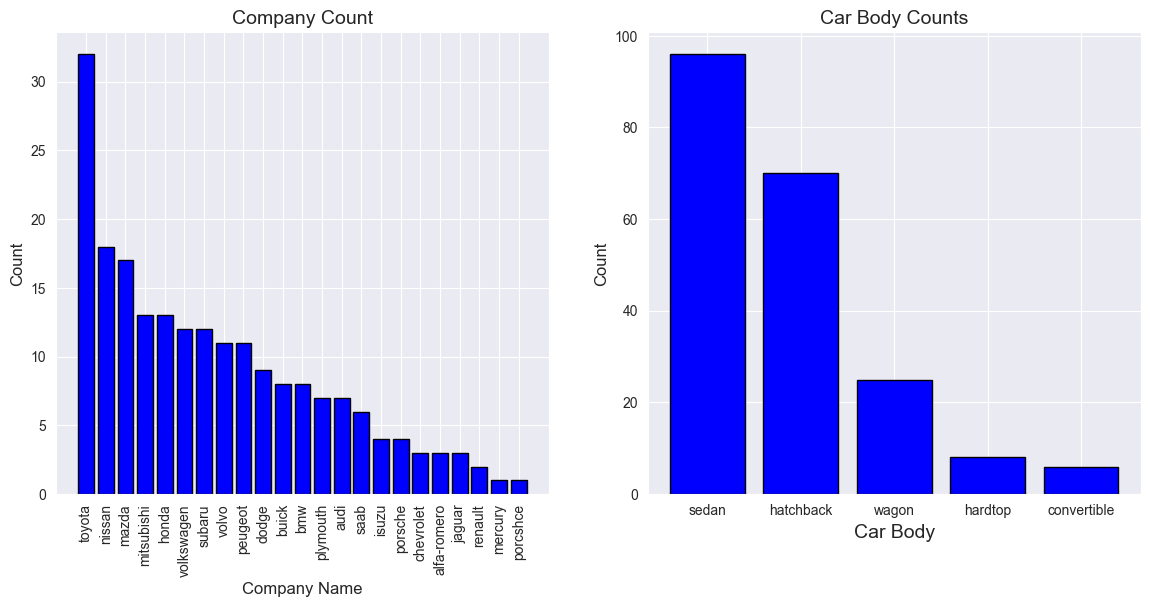

In [8]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

# Prepare data for plotting
company_counts = cars_df['car_company'].value_counts()
body_counts = cars_df['carbody'].value_counts()  # Assuming 'car_body' column exists

# Create subplots for side-by-side graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot 1: Car company distribution
axes[0].bar(company_counts.index, company_counts.values, color='blue', edgecolor='black')
axes[0].set_title('Company Count', fontsize=14)
axes[0].set_xlabel('Company Name', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)


axes[1].bar(body_counts.index, body_counts.values, color='blue', edgecolor='black')
axes[1].set_title('Car Body Counts', fontsize=14)
axes[1].set_xlabel('Car Body', fontsize=14)
axes[1].set_ylabel('Count', fontsize=12)

plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

From looking at the two graphs it can be concluded that Toyota is the most bought car with over 30 counts and the closest brand behind toyota is nissan and mazda with porsche being the least sold car. While the most popular style of car that is sold is the sedan with the least bought being the convertible.

3.2 Create the following plots

    1. A plot of the unique company names on the x-axis, and that companies average price on the y-axis.
    2. A plot of the unique car bodys on the x-axis and that car body's average price on the y-axis.

[4 Points]

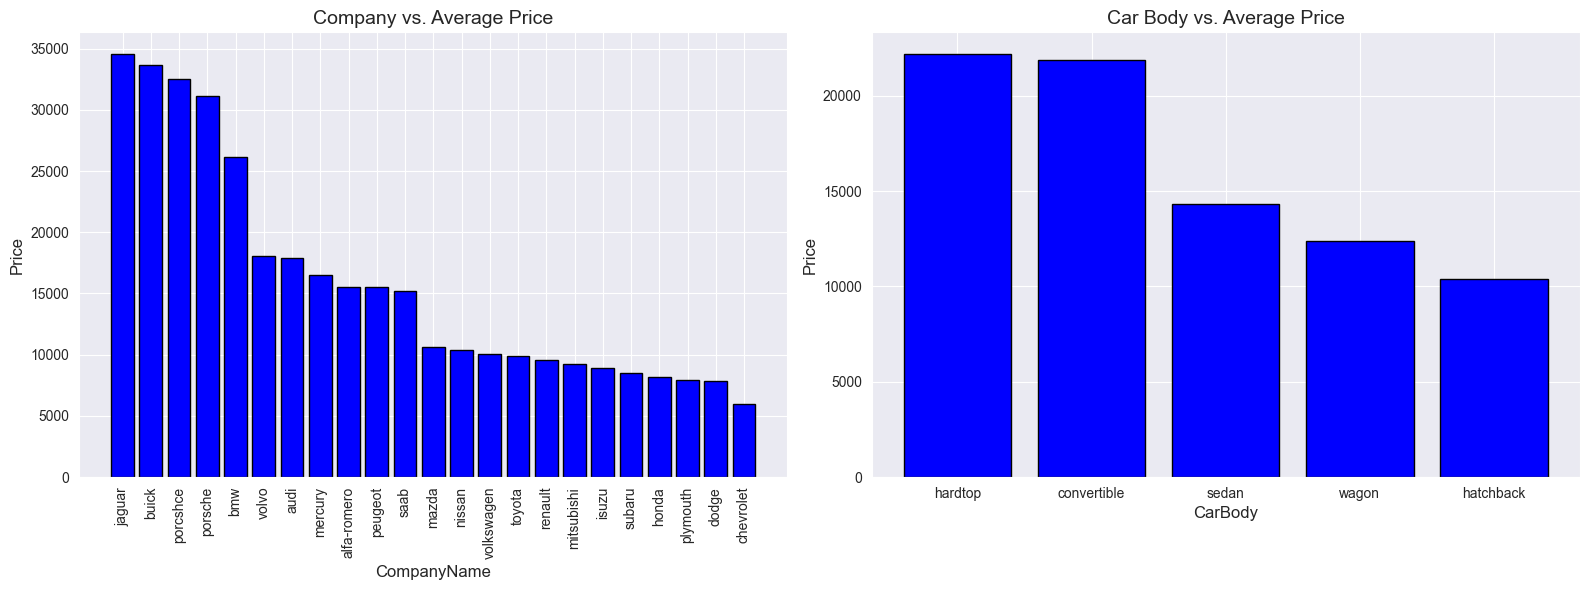

In [9]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

# avg price for each company
company_avg_price = cars_df.groupby('car_company')['price'].mean().sort_values(ascending=False)

#  avg price for each car body style
body_avg_price = cars_df.groupby('carbody')['price'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot 1: Company vs. Average Price
axes[0].bar(company_avg_price.index, company_avg_price.values, color='blue', edgecolor='black')
axes[0].set_title('Company vs. Average Price', fontsize=14)
axes[0].set_xlabel('CompanyName', fontsize=12)
axes[0].set_ylabel('Price', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Plot 2: Car Body vs. Average Price
axes[1].bar(body_avg_price.index, body_avg_price.values, color='blue',edgecolor='black')
axes[1].set_title('Car Body vs. Average Price', fontsize=14)
axes[1].set_xlabel('CarBody', fontsize=12)
axes[1].set_ylabel('Price', fontsize=12)

plt.tight_layout()
plt.show()


After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

The top three companies that cost the most are Jaguar, Buick ,and Porsche with Chevrolet being the most economical out of all of the Car companies in the data, with the hard-top and convertible style of car body being the most expensive and the hatchback the most economical option to choose from.

3.3 Create the following plots

    1. A plot of the unique symboling values on the x-axis, and the value counts on the y-axis.
    2. A box plot of the unique symboling values on the x-axis and price on the y-axis.

[4 Points]

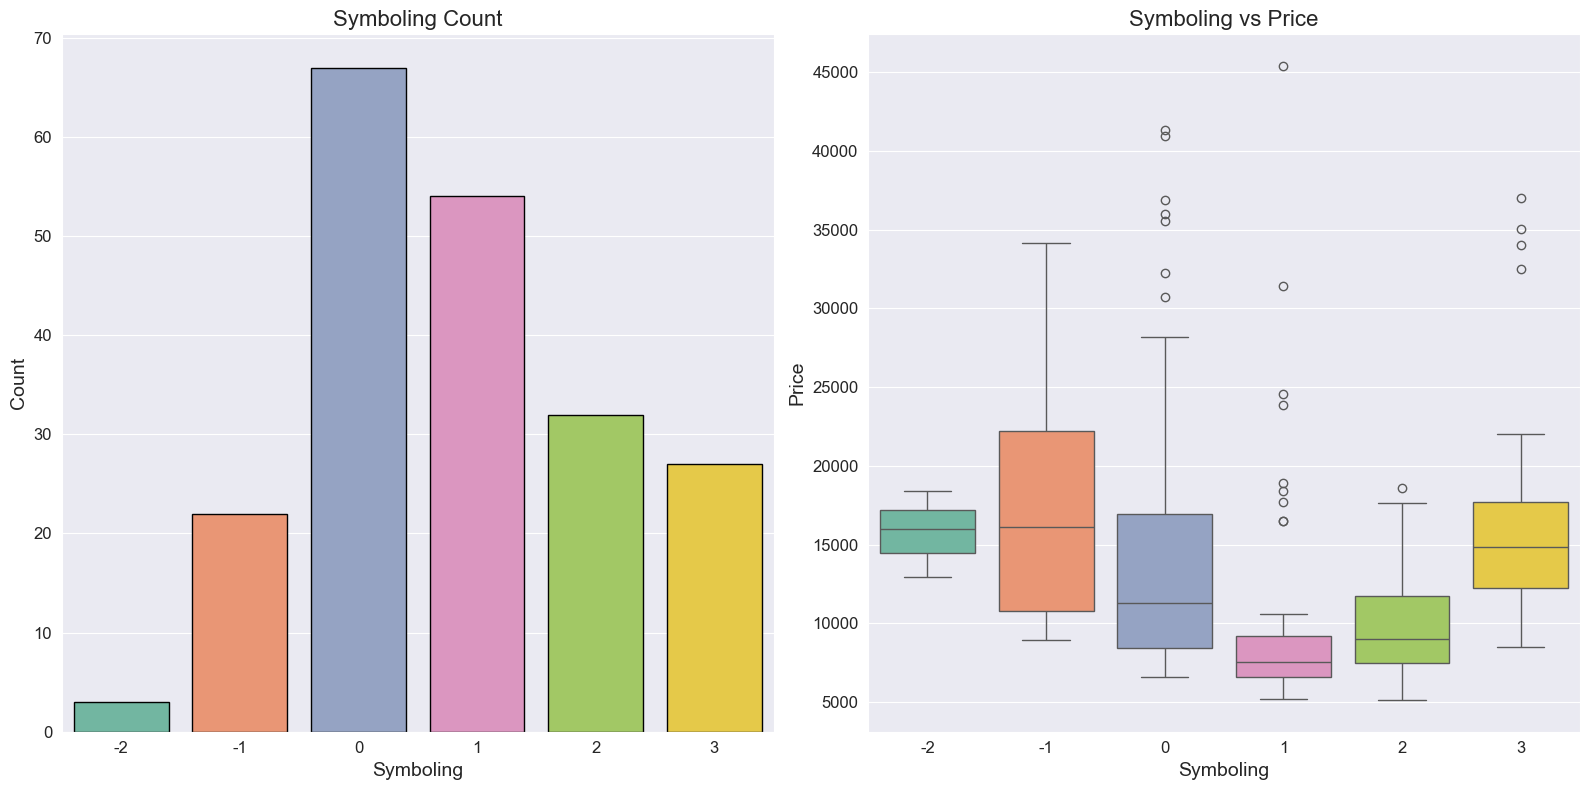

In [10]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

sns.set_style("darkgrid")
symboling_counts = cars_df['symboling'].value_counts().sort_index()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Symboling value counts (bar plot)
sns.barplot(x=symboling_counts.index, y=symboling_counts.values, ax=axes[0], hue=symboling_counts.index, palette='Set2', edgecolor='black', legend=False)
axes[0].set_title('Symboling Count', fontsize=16)
axes[0].set_xlabel('Symboling', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Box plot of Symboling vs Price
sns.boxplot(x='symboling', y='price', data=cars_df, ax=axes[1], hue='symboling', palette='Set2', legend=False)
axes[1].set_title('Symboling vs Price', fontsize=16)
axes[1].set_xlabel('Symboling', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
There is a negative correlation between safety and price as it can be seen that cars with lower symboling values (safer cars) are more expensive to the non safer cars with higher symboling that are in the more affordable price range.

3.4 Create the following plots

    1. A plot of enginetype on the x-axis, and the value counts on the y-axis.
    2. A box plot of enginetype on the x-axis and price on the y-axis.

[4 Points]

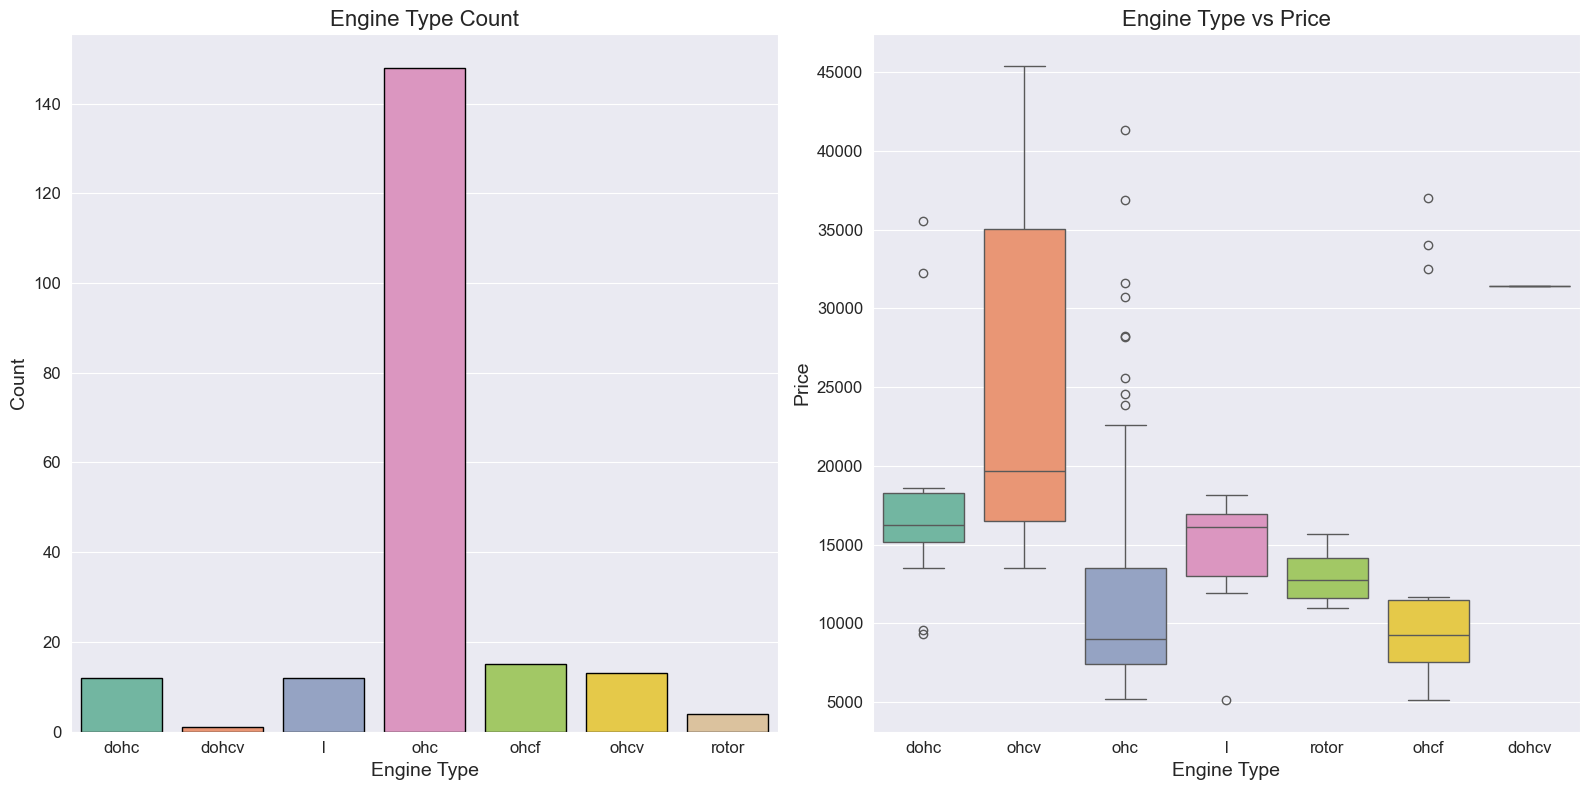

In [11]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
eng_type_count = cars_df['enginetype'].value_counts().sort_index()

sns.set_style('darkgrid')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Symboling value counts (bar plot)
sns.barplot(x=eng_type_count.index, y=eng_type_count.values, ax=axes[0], hue=eng_type_count.index, palette='Set2', edgecolor='black', legend=False)
axes[0].set_title('Engine Type Count', fontsize=16)
axes[0].set_xlabel('Engine Type', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Box plot of Symboling vs Price
sns.boxplot(x='enginetype', y='price', data=cars_df, ax=axes[1], hue='enginetype', palette='Set2', legend=False)
axes[1].set_title('Engine Type vs Price', fontsize=16)
axes[1].set_xlabel('Engine Type', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
Looking at the 2 plots we can conclude that OHCV and DOHC engines are associated with higher model cars due to the higher price, it can also be seen that OHC engines are the most popular option for cars that are purchased and they are in the more affordable price range.

3.5 Create the following plots

    1. A plot of cylindernumber on the x-axis, and the value counts on the y-axis.
    2. A box plot of cylindernumber on the x-axis and price on the y-axis.

[4 Points]

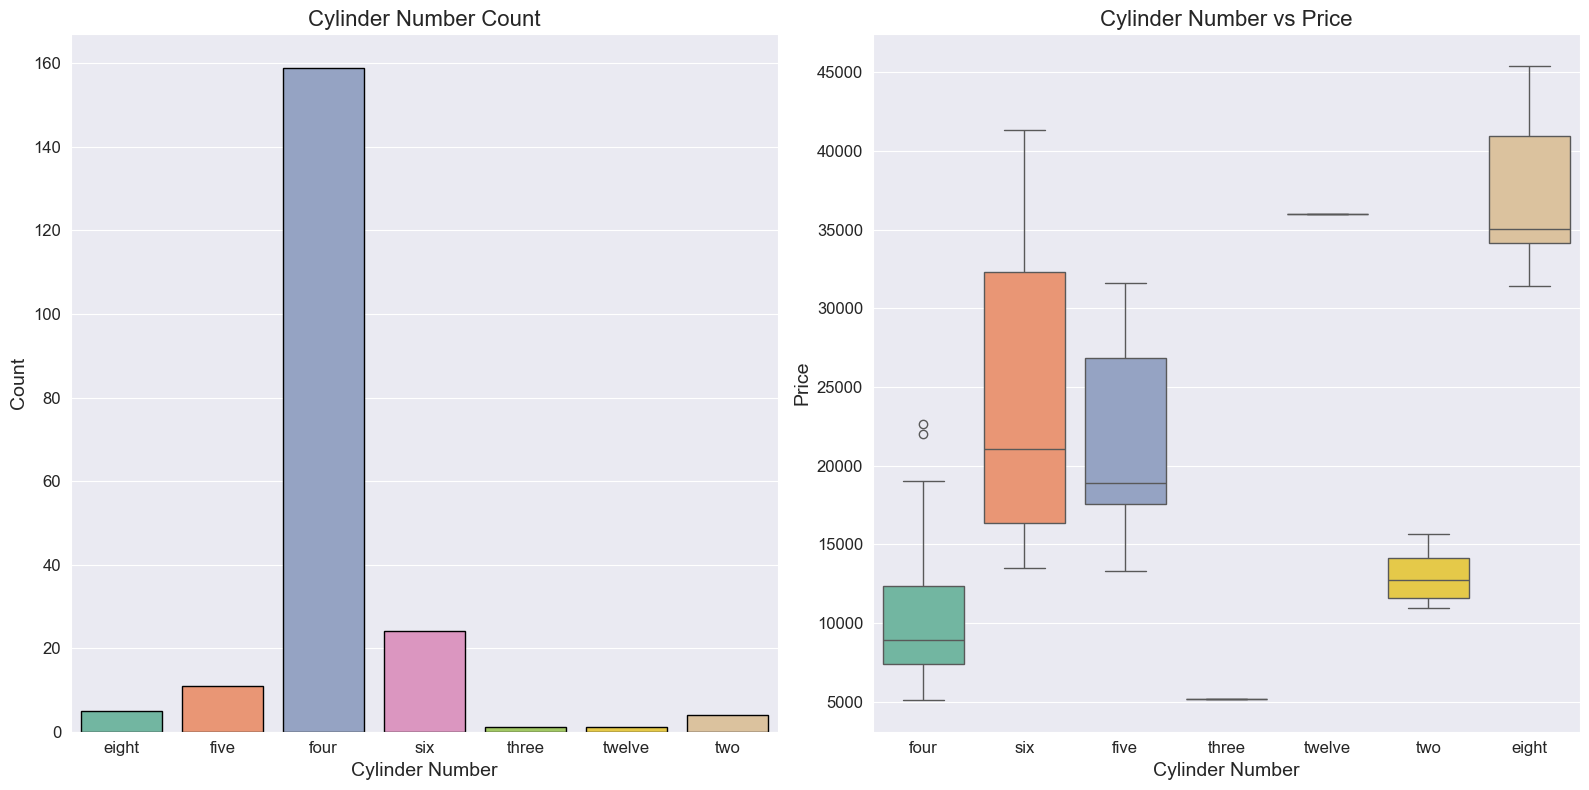

In [ ]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cylinder_count = cars_df['cylindernumber'].value_counts().sort_index()

sns.set_style('darkgrid')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Symboling value counts (bar plot)
sns.barplot(x=cylinder_count.index, y=cylinder_count.values, ax=axes[0], hue=cylinder_count.index, palette='Set2', edgecolor='black', legend=False)
axes[0].set_title('Cylinder Number Count', fontsize=16)
axes[0].set_xlabel('Cylinder Number', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Box plot of Symboling vs Price
sns.boxplot(x='cylindernumber', y='price', data=cars_df, ax=axes[1], hue='cylindernumber', palette='Set2', legend=False)
axes[1].set_title('Cylinder Number vs Price', fontsize=16)
axes[1].set_xlabel('Cylinder Number', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()


After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
We can conclude from the 2 plots that the engine style that is more popular is the 4 cylinder engine with the 6 cylinder engine close behind, but in terms of price the 4 cylinder engine is found more in economical price ranges with a smaller range in price differences while the 6 cylinder engine has the widest range in prices out of all the styles and if more expensive than the four cylinder engines.

3.6 Create the following plots

    1. A plot of fuelsystem on the x-axis, and the value counts on the y-axis.
    2. A box plot of fuelsystem on the x-axis and price on the y-axis.

[5 Points]

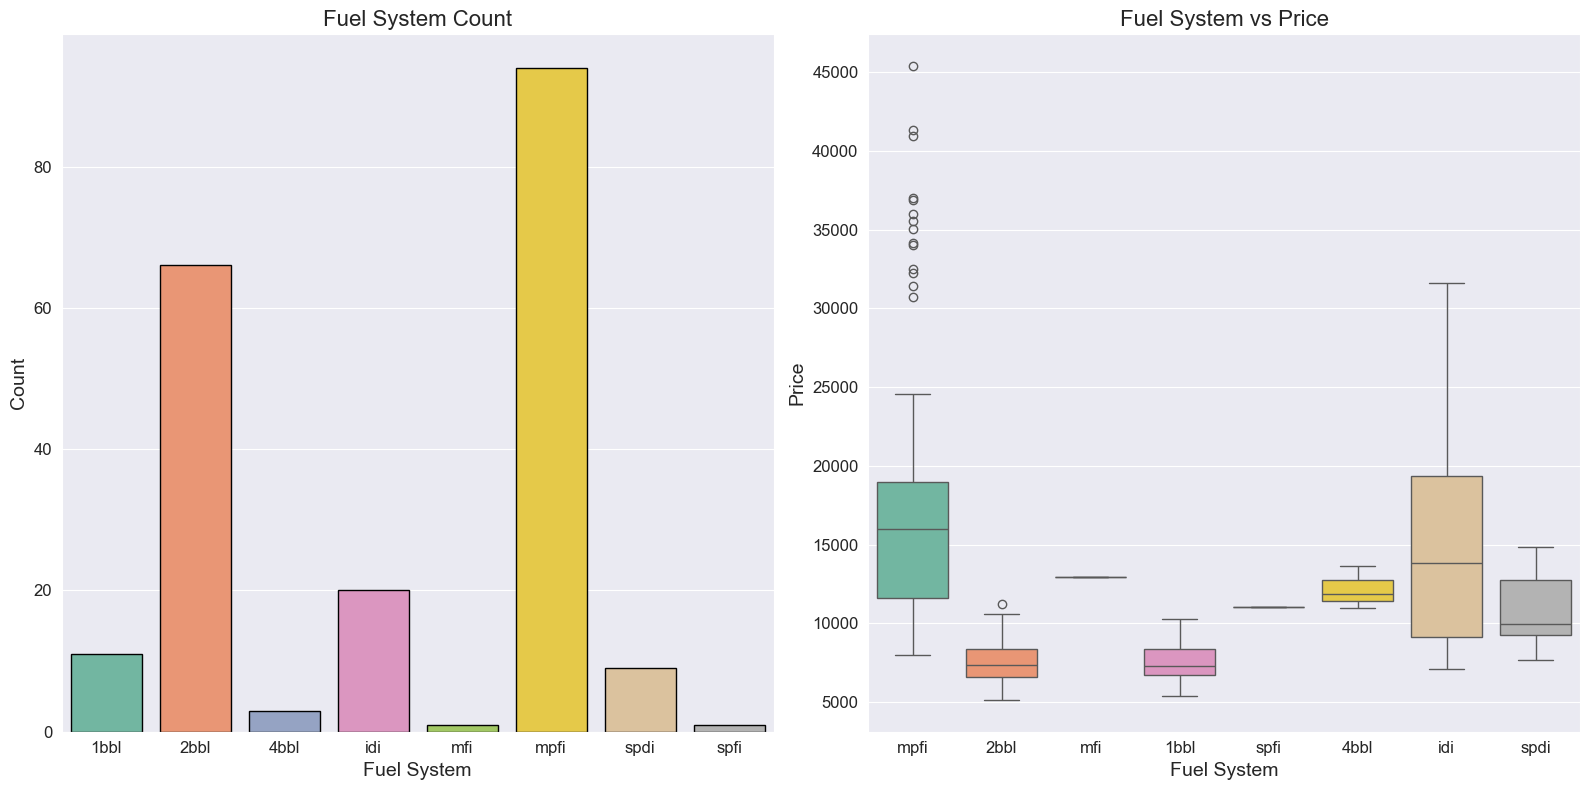

In [13]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
fuel_system_count = cars_df['fuelsystem'].value_counts().sort_index()

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Symboling value counts (bar plot)
sns.barplot(x=fuel_system_count.index, y=fuel_system_count.values, ax=axes[0], hue=fuel_system_count.index, palette='Set2', edgecolor='black', legend=False)
axes[0].set_title('Fuel System Count', fontsize=16)
axes[0].set_xlabel('Fuel System', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Box plot of Symboling vs Price
sns.boxplot(x='fuelsystem', y='price', data=cars_df, ax=axes[1], hue='fuelsystem', palette='Set2', legend=False)
axes[1].set_title('Fuel System vs Price', fontsize=16)
axes[1].set_xlabel('Fuel System', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
MPFI (Multi-Point Fuel Injection) is the most common fuel system in the dataset with around 90 vehicles and commands the highest median price with more price variation and outliers up to $45,000, while other systems like 2bbl and idi are less common and generally associated with lower-priced vehicles, suggesting that more advanced fuel injection systems are typically found in more expensive cars.

3.7 Create the following plots

    1. A plot of drivewheel on the x-axis, and the value counts on the y-axis.
    2. A box plot of drivewheel on the x-axis and price on the y-axis.

[5 Points]

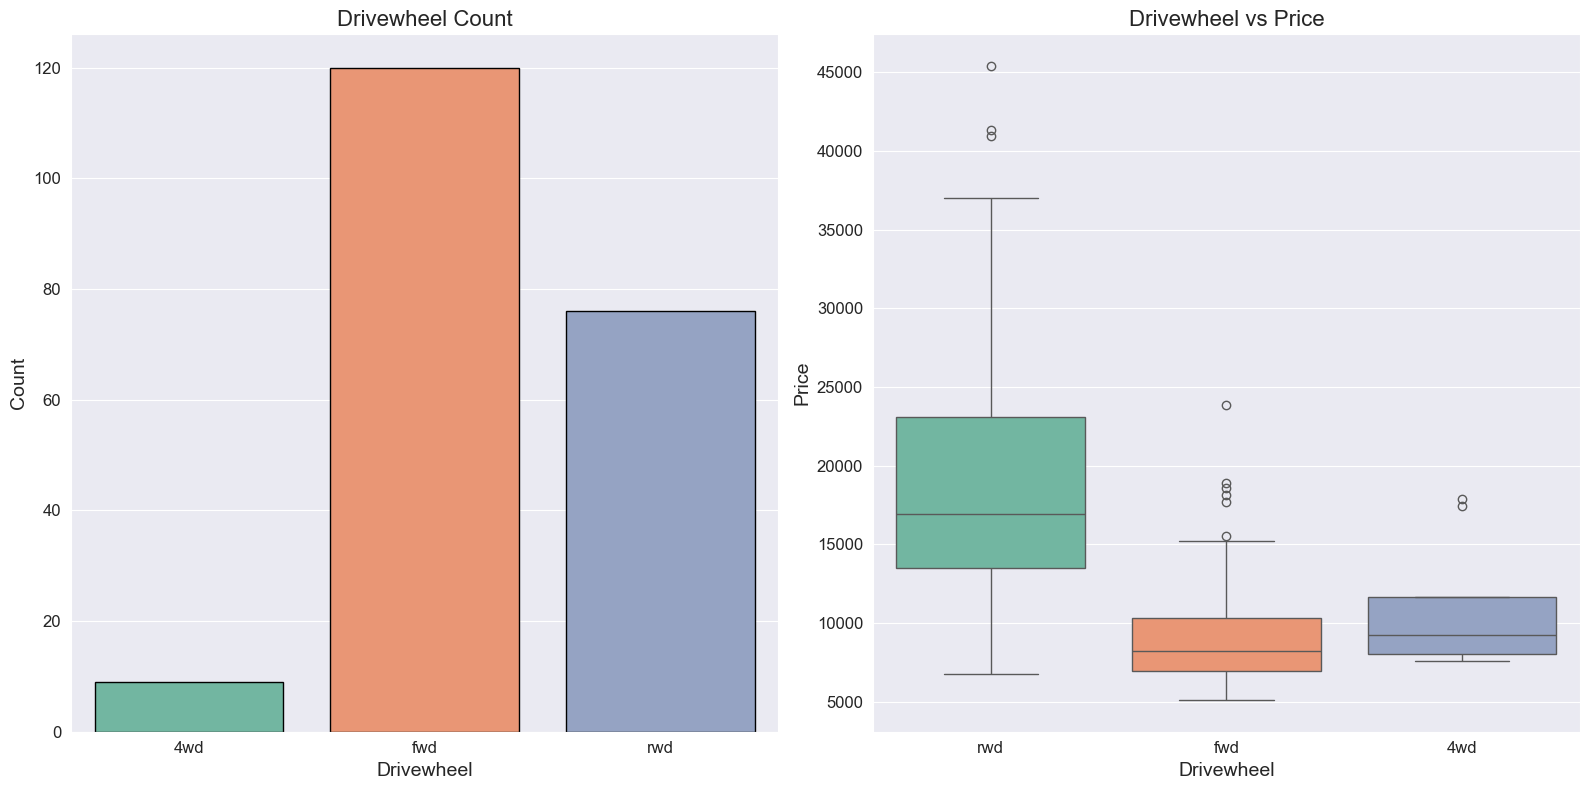

In [14]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
drivewheel_count = cars_df['drivewheel'].value_counts().sort_index()

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Symboling value counts (bar plot)
sns.barplot(x=drivewheel_count.index, y=drivewheel_count.values, ax=axes[0], hue=drivewheel_count.index, palette='Set2', edgecolor='black', legend=False)
axes[0].set_title('Drivewheel Count', fontsize=16)
axes[0].set_xlabel('Drivewheel', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Box plot of Symboling vs Price
sns.boxplot(x='drivewheel', y='price', data=cars_df, ax=axes[1], hue='drivewheel', palette='Set2', legend=False)
axes[1].set_title('Drivewheel vs Price', fontsize=16)
axes[1].set_xlabel('Drivewheel', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
It can be concluded that "fwd" and "rwd" drivewheel styles are more popular among the cars that are sold in the market with a small amount of "4wd" units being sold. Also the fwd units are the more economical in comparison to the "rwd" and "4wd" models but the "rwd" models have the biggest price range while the "fwd" models have a more economical price range and can explain why it is the model that is sold the most out of the 3 drivewheels.

3.8 Create the following plots

    1. A plot of enginelocation on the x-axis, and the value counts on the y-axis.
    2. A box plot of enginelocation on the x-axis and price on the y-axis.

[5 Points]

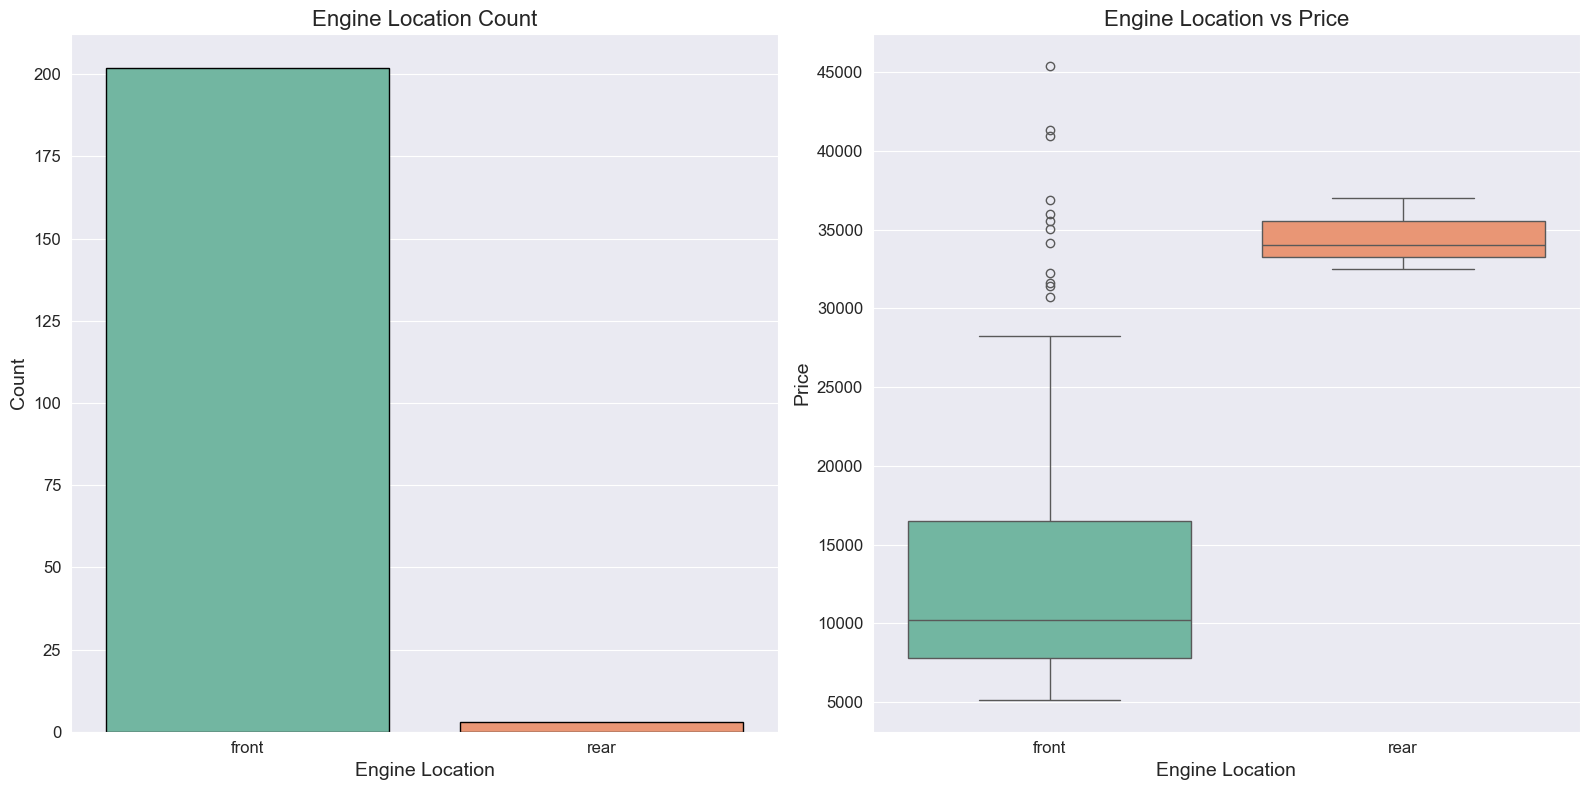

In [15]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
eng_loc_count = cars_df['enginelocation'].value_counts().sort_index()

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Symboling value counts (bar plot)
sns.barplot(x=eng_loc_count.index, y=eng_loc_count.values, ax=axes[0], hue=eng_loc_count.index, palette='Set2', edgecolor='black', legend=False)
axes[0].set_title('Engine Location Count', fontsize=16)
axes[0].set_xlabel('Engine Location', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Box plot of Symboling vs Price
sns.boxplot(x='enginelocation', y='price', data=cars_df, ax=axes[1], hue='enginelocation', palette='Set2', legend=False)
axes[1].set_title('Engine Location vs Price', fontsize=16)
axes[1].set_xlabel('Engine Location', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
We can conlcude from the 2 plots that the majority of vehicles have a front-engine configuration, while rear-engine vehicles are significantly fewer in number. Additionally, rear-engine vehicles tend to be more expensive on average, with a narrower price range where the front-engine vehicles show a wider price distribution with several outliers.

3.9 Create the following plots

    1. A plot of fueltype on the x-axis, and the value counts on the y-axis.
    2. A box plot of fueltype on the x-axis and price on the y-axis.

[5 Points]

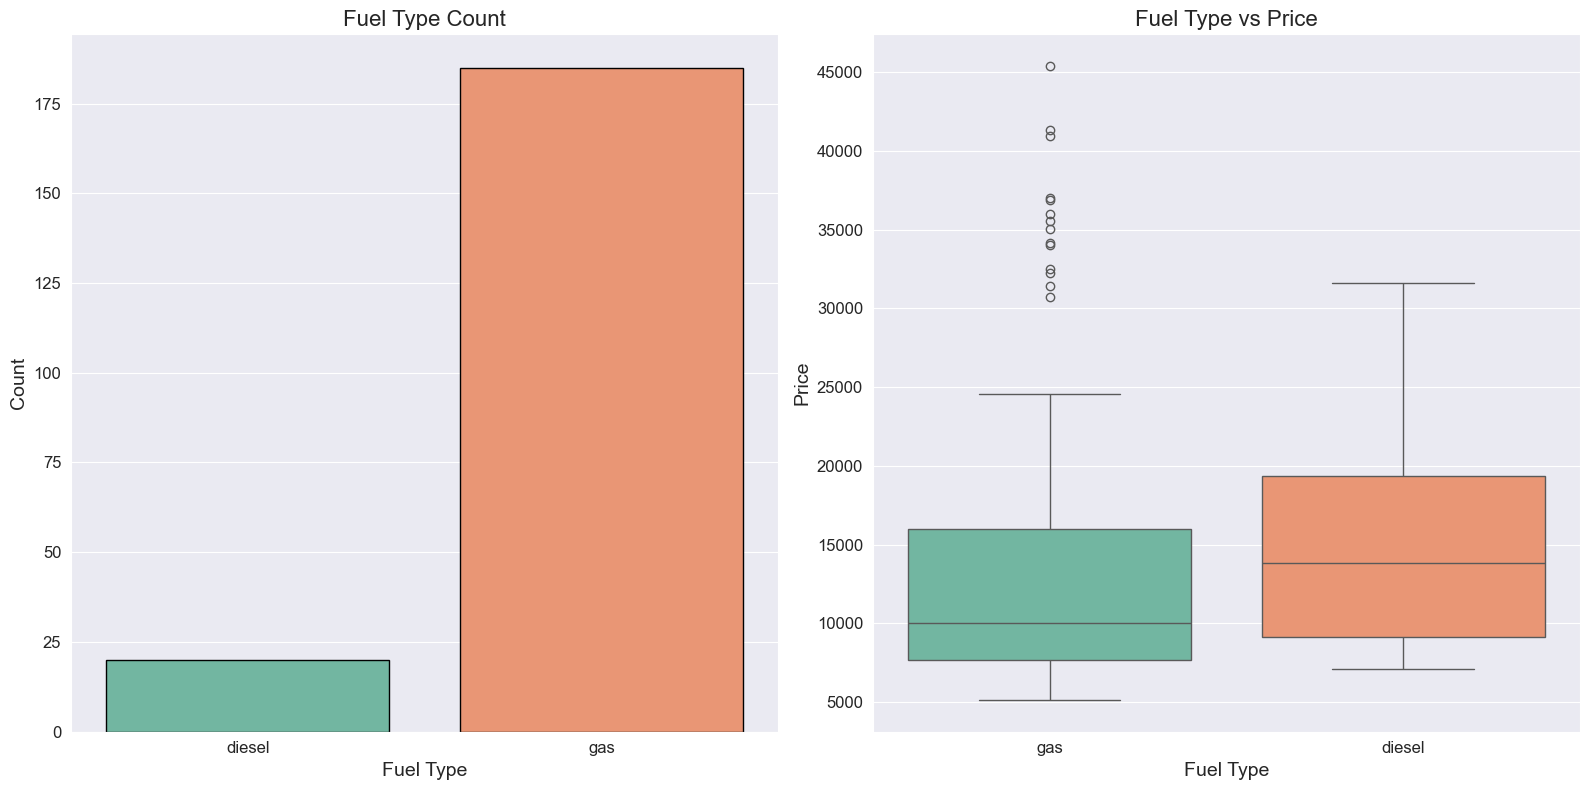

In [16]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
fuel_type_count = cars_df['fueltype'].value_counts().sort_index()

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Symboling value counts (bar plot)
sns.barplot(x=fuel_type_count.index, y=fuel_type_count.values, ax=axes[0], hue=fuel_type_count.index, palette='Set2', edgecolor='black', legend=False)
axes[0].set_title('Fuel Type Count', fontsize=16)
axes[0].set_xlabel('Fuel Type', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Box plot of Symboling vs Price
sns.boxplot(x='fueltype', y='price', data=cars_df, ax=axes[1], hue='fueltype', palette='Set2', legend=False)
axes[1].set_title('Fuel Type vs Price', fontsize=16)
axes[1].set_xlabel('Fuel Type', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
We can conclude that diesel vehicles tend to have a higher median price and a wider price range, compared to gas vehicles which have more outliers at the higher end of the price spectrum. It can also be seen that the majority of vehicles are outfitted to run off gas instead of diesel.

3.10 Create the following plots

    1. A plot of doornumber on the x-axis, and the value counts on the y-axis.
    2. A box plot of doornumber on the x-axis and price on the y-axis.

[5 Points]

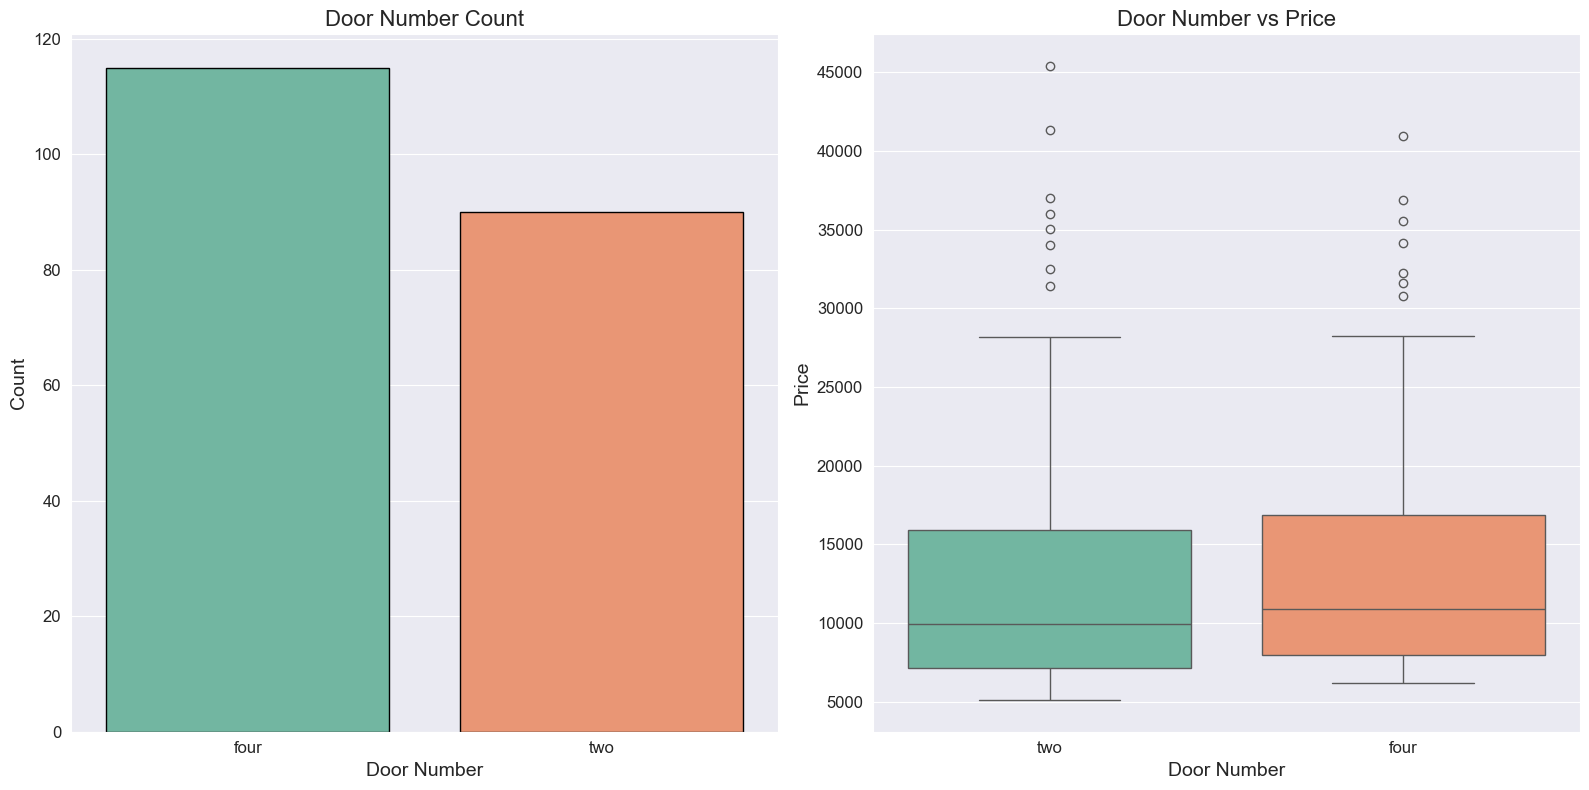

In [17]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
door_count = cars_df['doornumber'].value_counts().sort_index()

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Symboling value counts (bar plot)
sns.barplot(x=door_count.index, y=door_count.values, ax=axes[0], hue=door_count.index, palette='Set2', edgecolor='black', legend=False)
axes[0].set_title('Door Number Count', fontsize=16)
axes[0].set_xlabel('Door Number', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Box plot of Symboling vs Price
sns.boxplot(x='doornumber', y='price', data=cars_df, ax=axes[1], hue='doornumber', palette='Set2', legend=False)
axes[1].set_title('Door Number vs Price', fontsize=16)
axes[1].set_xlabel('Door Number', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
It can be concluded that there is more vehicles with four doors in comparison to vehicles with two doors, however when looking at the prices it can be seen that the median prices of both styles are similar but two door vehicles has a higher price range with more outliers.

3.11 Create the following plots

    1. A plot of aspiration on the x-axis, and the value counts on the y-axis.
    2. A box plot of aspiration on the x-axis and price on the y-axis.

[5 Points]

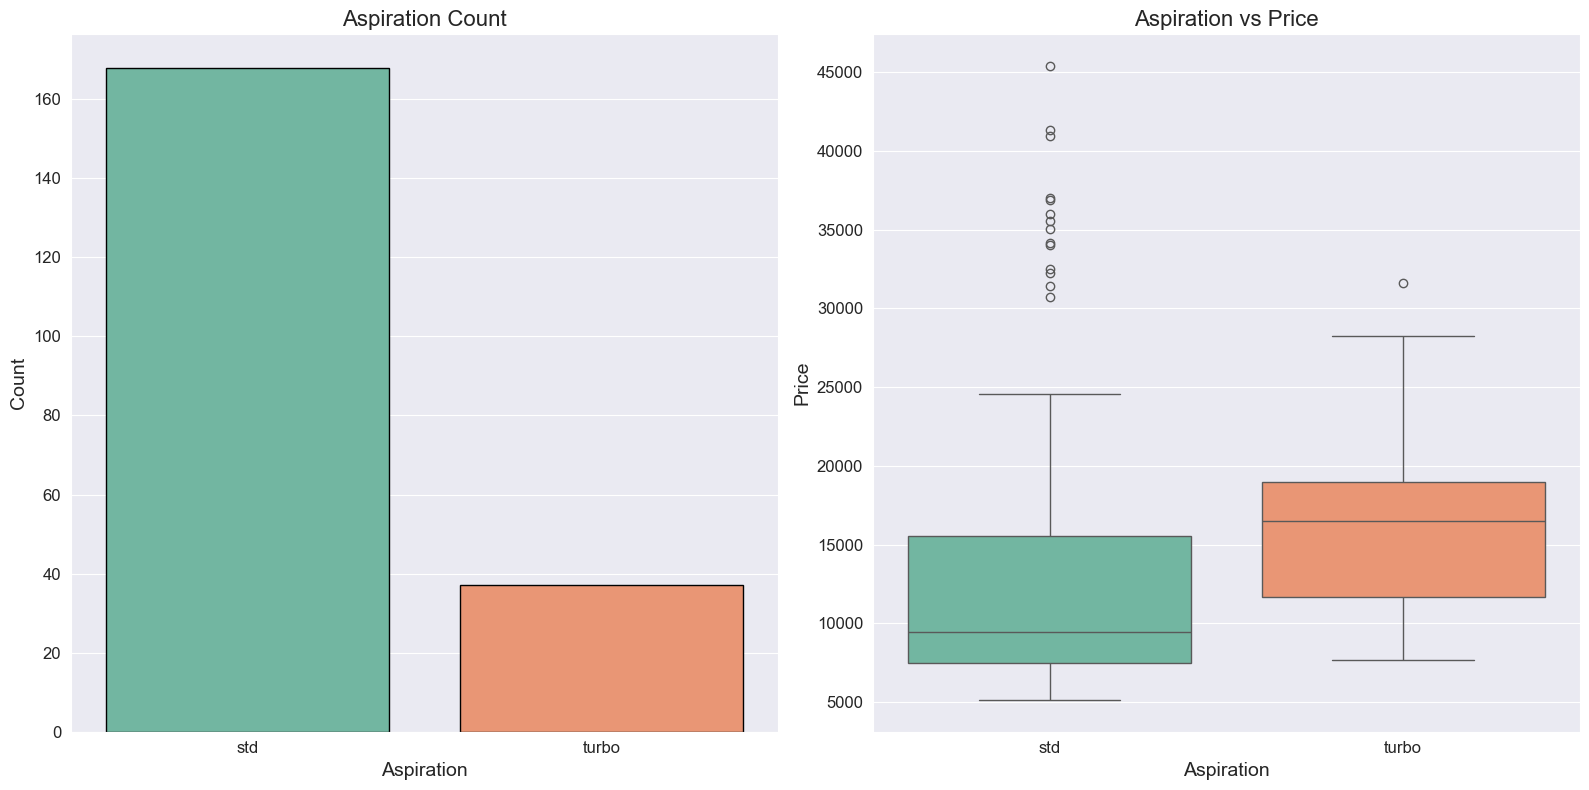

In [18]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
aspiration_count = cars_df['aspiration'].value_counts().sort_index()

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Symboling value counts (bar plot)
sns.barplot(x=aspiration_count.index, y=aspiration_count.values, ax=axes[0], hue=door_count.index, palette='Set2', edgecolor='black', legend=False)
axes[0].set_title('Aspiration Count', fontsize=16)
axes[0].set_xlabel('Aspiration', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Box plot of Symboling vs Price
sns.boxplot(x='aspiration', y='price', data=cars_df, ax=axes[1], hue='aspiration', palette='Set2', legend=False)
axes[1].set_title('Aspiration vs Price', fontsize=16)
axes[1].set_xlabel('Aspiration', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
The dataset contains significantly more standard aspiration vehicles than turbo models, in which the turbocharged vehicles generally have higher prices with a median around $16,000 compared to standard aspiration vehicles with a median around $9,000. However it can be seen that both categories show considerable price variation and outliers at the high end.

## Part 4: Visualizing Numerical Data

### [15 Points]

    price
    carlength
    carwidth
    carheight
    curbweight
    enginesize
    boreratio
    stroke
    compressionratio
    horsepower
    peakrpm
    wheelbase
    citympg
    highwaympg

4.1 Create the following plots

    1. A plot showing the price distribution
    2. A box plot of price

[3 Points]

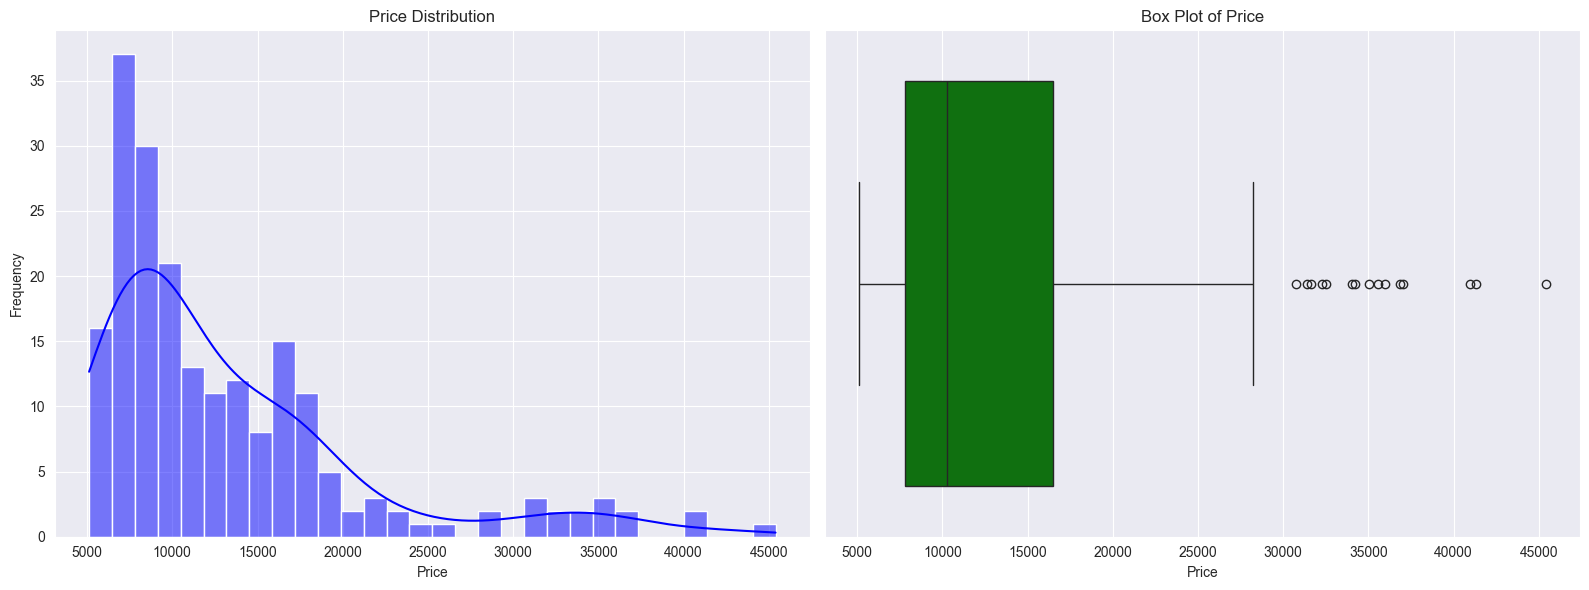

In [19]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# 1 row and 2 columns subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot 1: Price Distribution (Histogram with KDE) on the first axis
sns.histplot(cars_df['price'], kde=True, color='blue', bins=30, ax=axes[0])
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot 2: Box Plot of Price on the second axis
sns.boxplot(x=cars_df['price'], color='green', ax=axes[1])
axes[1].set_title('Box Plot of Price')
axes[1].set_xlabel('Price')

plt.tight_layout()
plt.show()


After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
Looking at the two plots we can see the price distribution of cars in the dataset is right-skewed, with most vehicles clustered in the $5,000-15,000 range, while the box plot reveals several outliers in the luxury segment above $30,000, suggesting that while the majority of cars are in the affordable to mid-range market, there's a distinct premium segment that commands significantly higher prices.

Let's try and get an idea of how the car attributes related to a car's size are related to price.

4.2 Create the following plots

    1. A scatter plot of carlength vs price.
    2. A scatter plot of carwidth vs price.
    3. A scatter plot of carheight vs price.
    4. A scatter plot of carweight vs price.

[3 Points]

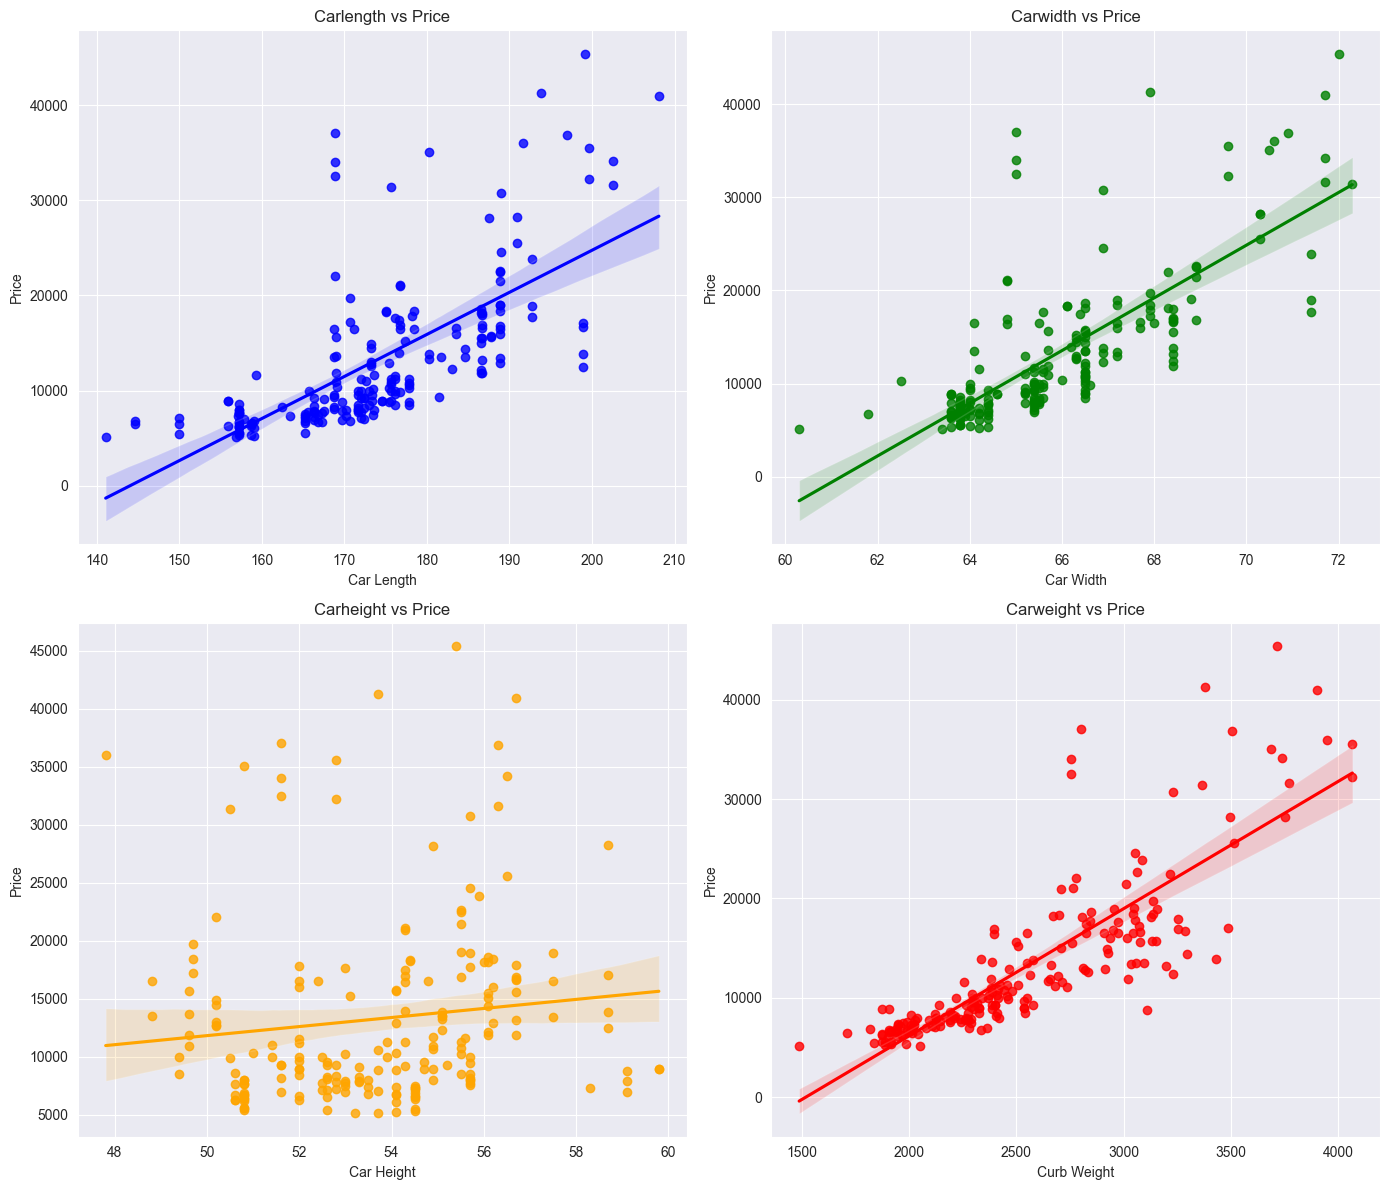

In [20]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Carlength vs Price
sns.regplot(x='carlength', y='price', data=cars_df, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Carlength vs Price')
axes[0, 0].set_xlabel('Car Length')
axes[0, 0].set_ylabel('Price')

# Carwidth vs Price
sns.regplot(x='carwidth', y='price', data=cars_df, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Carwidth vs Price')
axes[0, 1].set_xlabel('Car Width')
axes[0, 1].set_ylabel('Price')

# Carheight vs Price
sns.regplot(x='carheight', y='price', data=cars_df, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Carheight vs Price')
axes[1, 0].set_xlabel('Car Height')
axes[1, 0].set_ylabel('Price')

# Carweight vs Price
sns.regplot(x='curbweight', y='price', data=cars_df, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Carweight vs Price')
axes[1, 1].set_xlabel('Curb Weight')
axes[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()


After creating the 4 plots above, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
It can be concluded from the 4 graphs that the vehicle dimensions and the weight are strong determinants in the pricing of the vehicle. as it can be seen the length, width and the weight of the car are influential in the price of the cars as the customers prefer those categories more.

4.3 Create scatter plots of the remaining numerical variables to see their relationship with price.

Create the following plots

    1. A scatter plot of enginesize vs price.
    2. A scatter plot of boreratio vs price.
    3. A scatter plot of stroke vs price.
    4. A scatter plot of compressionratio vs price.
    5. A scatter plot of horsepower vs price.
    6. A scatter plot of peakrpm vs price.
    7. A scatter plot of wheelbase vs price.
    8. A scatter plot of citympg vs price.
    9. A scatter plot of highwaympg vs price.

[3 Points]

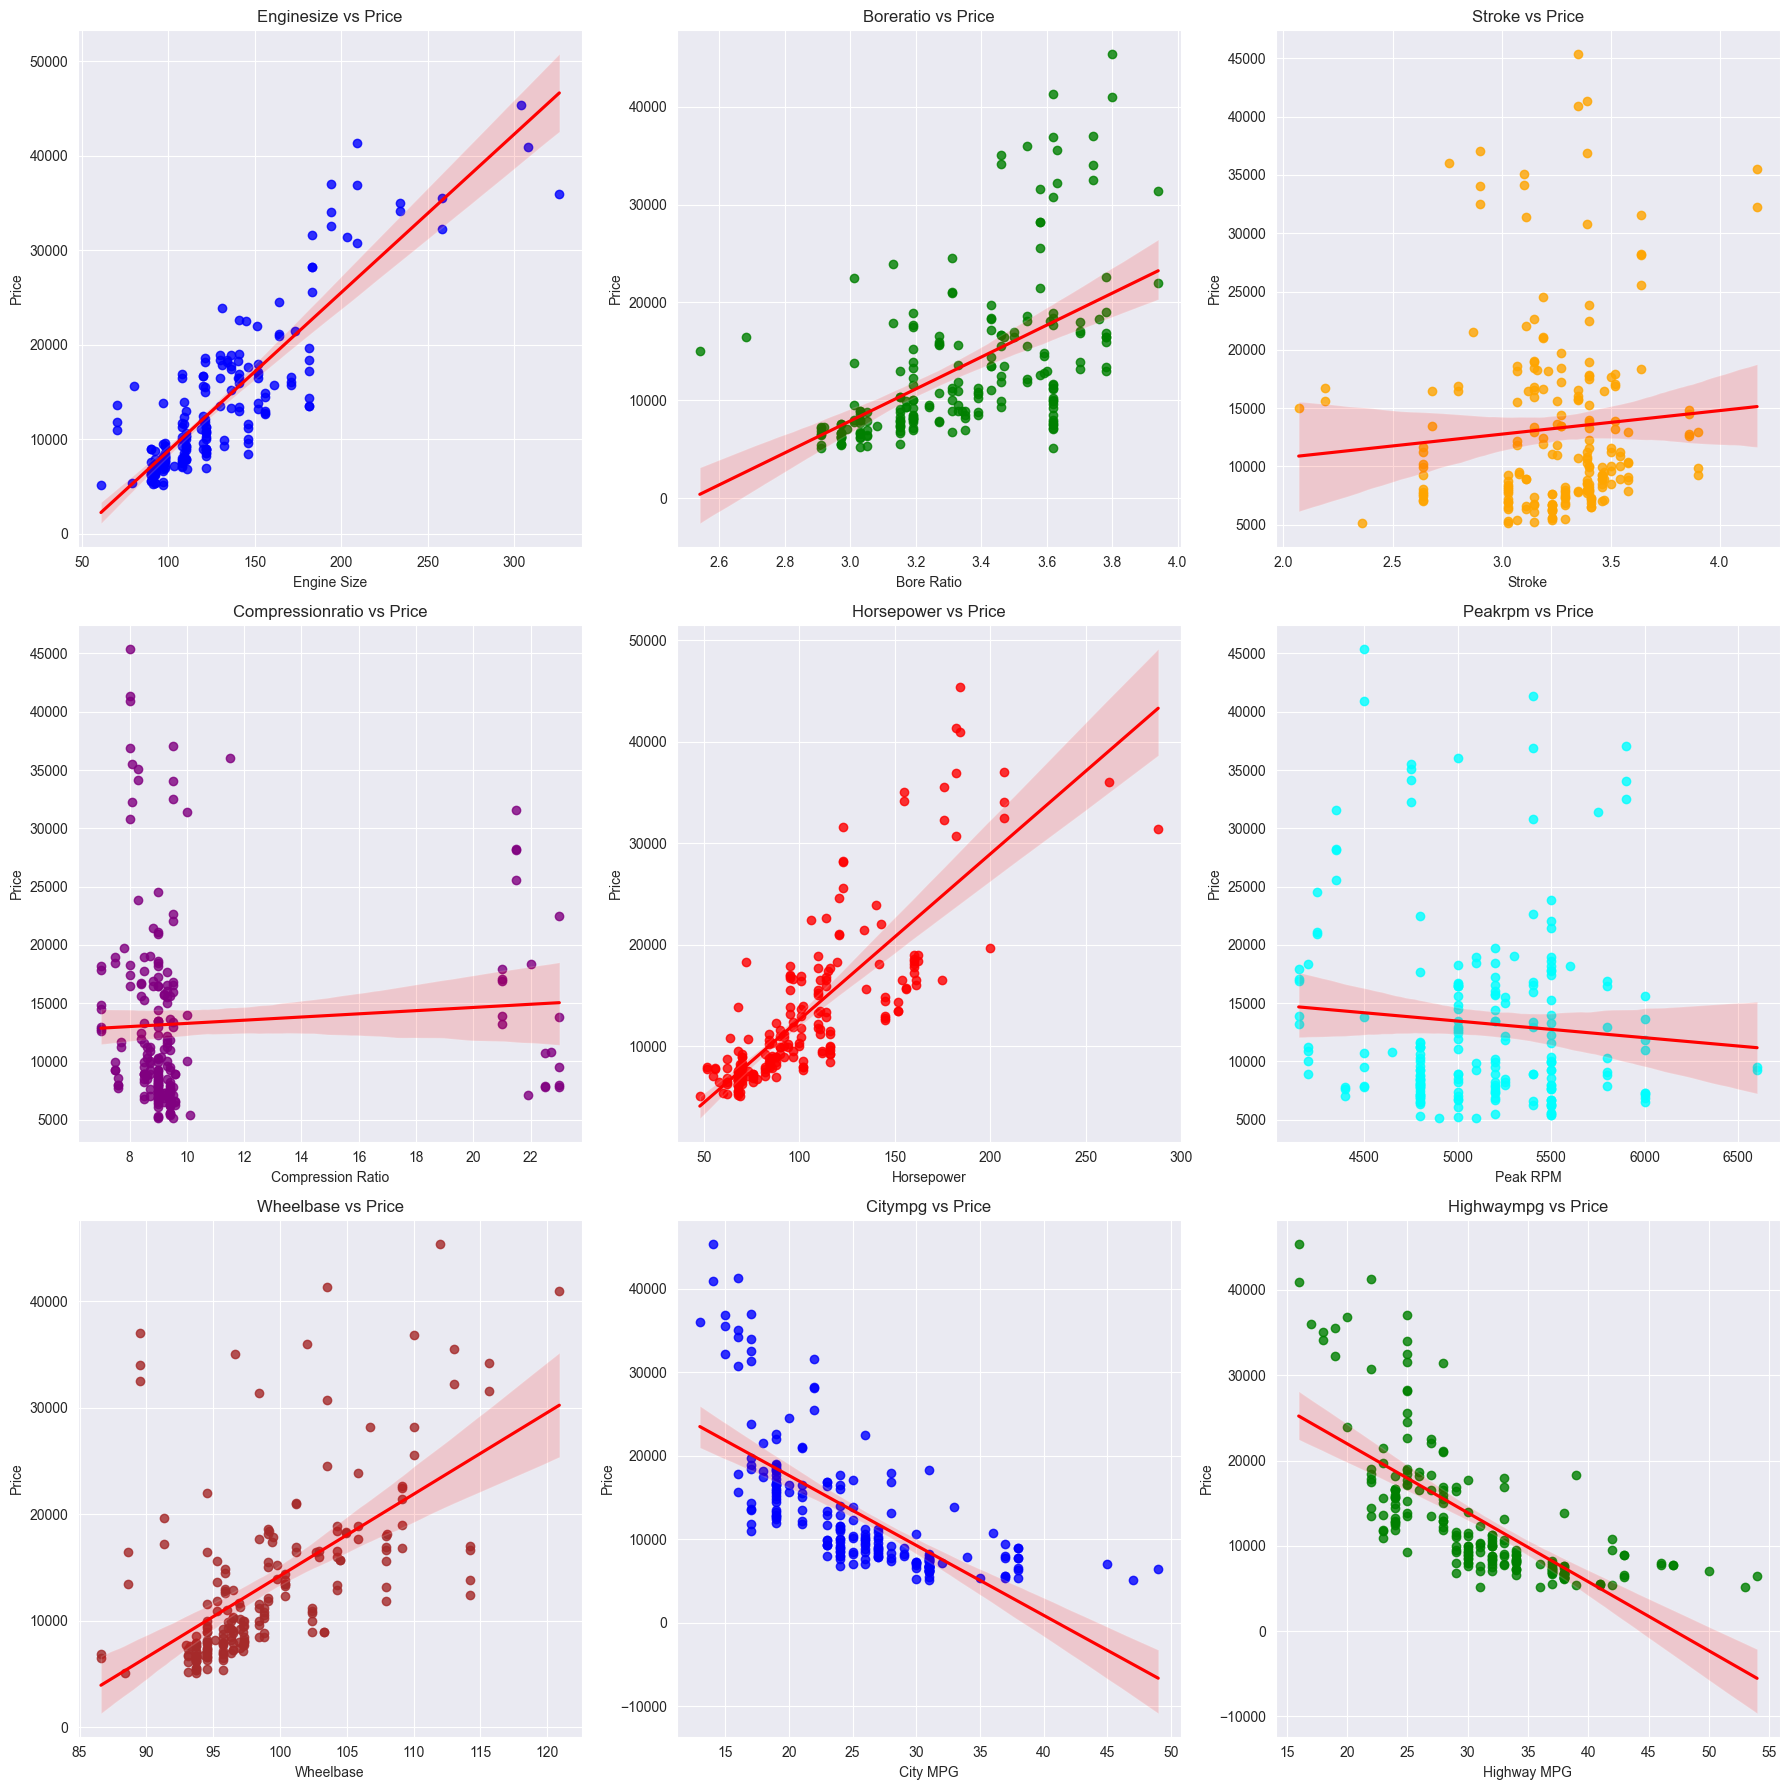

In [21]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# 3 rows and 3 column subplot
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

#  Enginesize vs Price
sns.regplot(x='enginesize', y='price', data=cars_df, ax=axes[0, 0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0, 0].set_title('Enginesize vs Price')
axes[0, 0].set_xlabel('Engine Size')
axes[0, 0].set_ylabel('Price')

#  Boreratio vs Price
sns.regplot(x='boreratio', y='price', data=cars_df, ax=axes[0, 1], scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
axes[0, 1].set_title('Boreratio vs Price')
axes[0, 1].set_xlabel('Bore Ratio')
axes[0, 1].set_ylabel('Price')

#  Stroke vs Price
sns.regplot(x='stroke', y='price', data=cars_df, ax=axes[0, 2], scatter_kws={'color': 'orange'}, line_kws={'color': 'red'})
axes[0, 2].set_title('Stroke vs Price')
axes[0, 2].set_xlabel('Stroke')
axes[0, 2].set_ylabel('Price')

#  Compressionratio vs Price
sns.regplot(x='compressionratio', y='price', data=cars_df, ax=axes[1, 0], scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
axes[1, 0].set_title('Compressionratio vs Price')
axes[1, 0].set_xlabel('Compression Ratio')
axes[1, 0].set_ylabel('Price')

#  Horsepower vs Price
sns.regplot(x='horsepower', y='price', data=cars_df, ax=axes[1, 1], scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
axes[1, 1].set_title('Horsepower vs Price')
axes[1, 1].set_xlabel('Horsepower')
axes[1, 1].set_ylabel('Price')

#  Peakrpm vs Price
sns.regplot(x='peakrpm', y='price', data=cars_df, ax=axes[1, 2], scatter_kws={'color': 'cyan'}, line_kws={'color': 'red'})
axes[1, 2].set_title('Peakrpm vs Price')
axes[1, 2].set_xlabel('Peak RPM')
axes[1, 2].set_ylabel('Price')

# Wheelbase vs Price
sns.regplot(x='wheelbase', y='price', data=cars_df, ax=axes[2, 0], scatter_kws={'color': 'brown'}, line_kws={'color': 'red'})
axes[2, 0].set_title('Wheelbase vs Price')
axes[2, 0].set_xlabel('Wheelbase')
axes[2, 0].set_ylabel('Price')

# Citympg vs Price
sns.regplot(x='citympg', y='price', data=cars_df, ax=axes[2, 1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[2, 1].set_title('Citympg vs Price')
axes[2, 1].set_xlabel('City MPG')
axes[2, 1].set_ylabel('Price')

# Highwaympg vs Price
sns.regplot(x='highwaympg', y='price', data=cars_df, ax=axes[2, 2], scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
axes[2, 2].set_title('Highwaympg vs Price')
axes[2, 2].set_xlabel('Highway MPG')
axes[2, 2].set_ylabel('Price')

plt.tight_layout()
plt.show()


After creating the plots above, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE
From the multiple graphs we can conclude that there is several factors that are affecting the vehicle price. In which engine size, horsepower, and wheelbase show strong positive correlations with car price, while city and highway MPG demonstrate clear negative correlations, suggesting that larger, more powerful and less fuel-efficient vehicles tend to have higher prices in the market, while technical specifications like compression ratio, stroke, and peak RPM have weaker or inconsistent relationships with price.

4.4 Create a heatmap or correlation matrix to inspect the correlations in our dataset.

[3 Points]

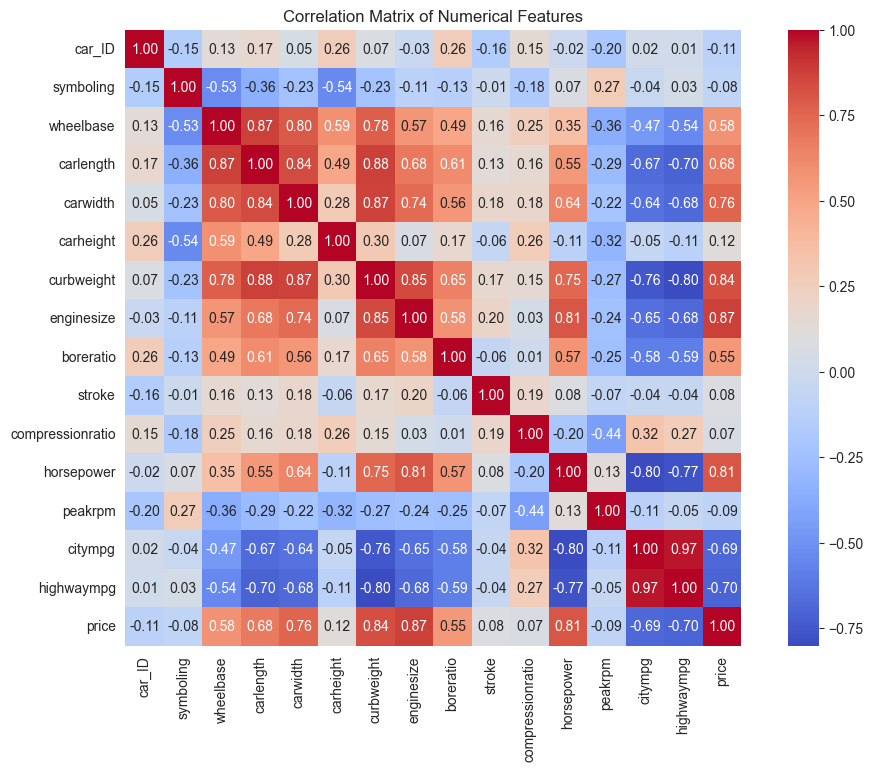

In [22]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
# Filter only numerical columns that we need for the heatmap
numerical_data = cars_df.select_dtypes(include='number')
correlation_matrix = numerical_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()




After creating the plot above, what can you conclude? Are there any features you can combine to form a new one? If so, try it out and see how it affects your final results in the end.

### TYPE YOUR ANSWER HERE
Looking at the heatmap it can be seen that there is alot of features that we can combine and some features that are negatively affecting the data and should be dropped, examples of some features that should be dropped are car_id, and symbolling for example, as the correlations are closing to 0, and examples of features that we can combine are for exmaple citympg and highwaympg since they have very close correlations and can be combined, this can also be seen in the features like (wheeelbase, carlength, carwidth, carheight, curbweight), by combining these my r-square improved by alot as the noise and negative data was eliminated from the model.

4.5 For example, citympg and highwaympg can be combined into a single feature. Create a new column called 'fuel_economy' that's a combination of the 2.


In [23]:
### WRITE YOUR CODE HERE ###
#print("Available columns: ", cars_df.columns.to_list)

# Combine categorical features
cars_df['car_size'] = (cars_df['wheelbase'] + cars_df['carlength'] + cars_df['carwidth'] + cars_df['carheight'] + cars_df['curbweight']) / 5
cars_df['performance'] = (cars_df['enginesize'] + cars_df['horsepower']) / 2
cars_df['engine_geo'] = (cars_df['stroke'] + cars_df['boreratio'] + cars_df['compressionratio']) / 3
cars_df['powertrain'] = cars_df['enginetype'] + '_' + cars_df['cylindernumber'] + '_' + cars_df['fuelsystem']
cars_df['body_style'] = cars_df['carbody'] + '_' + cars_df['doornumber']

# Creating the fuel economy column
cars_df['fuel_economy'] = (cars_df['citympg'] + cars_df['highwaympg']) / 2

features_to_drop = [
    # ID and low-impact features
    'car_ID',
    'enginelocation', 
    'symboling',
    'peakrpm',
    'CarName',# Since we have car_company
    'car_company',
    
    # Original features that were combined that improved my model
    'wheelbase', 
    'carlength',
    'carwidth', 
    'carheight',
    'curbweight',
    'enginesize',
    'horsepower',
    'stroke',
    'boreratio',
    'compressionratio',
    'citympg',
    'highwaympg',
    'enginetype',
    'cylindernumber',
    'fuelsystem',
    'carbody',
    'doornumber'
]

# Display the first few rows of the DataFrame
print(cars_df[['citympg', 'highwaympg', 'fuel_economy']].head())


cars_df = cars_df.drop(features_to_drop, axis=1)


#plt.figure(figsize=(8, 6))
#sns.histplot(cars_df['fuel_economy'], kde=True, color='purple')
#plt.title('Fuel Economy Distribution')
#plt.xlabel('Fuel Economy (MPG)')
#plt.ylabel('Frequency')
#plt.show() 




   citympg  highwaympg  fuel_economy
0       21          27          24.0
1       21          27          24.0
2       19          26          22.5
3       24          30          27.0
4       18          22          20.0


After visual analysis, which variables do you believe to be significant when predicting price, and why?

[3 Points]

### TYPE YOUR ANSWER HERE
From a visual analysis it can be seen that the vehicle dimensions (width, length, weight), the vehicles performance (Horsepower, Engine Size), and the fuel economy ( Highway MPG, City MPG) are the most significant in predicting the price based on the strong correlations that they have. This makes sense as bigger cars with more power generally will cost more in comparison to smaller and lighter cars that are more fuel efficient.

## Part 5: Data Pre-Processing

### [5 Points]

Perform the following

    1. Convert your categorical variables into dummy variables
    2. Scale the data using a scaler of your choice
    3. Split your data into a training and testing set, with test size of 0.30



In [24]:
# Convert categorical variables into dummy variables
cars_df = pd.get_dummies(cars_df, drop_first=True)
X = cars_df.drop("price", axis=1)
y = cars_df["price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Scale only after splitting, if we do it the other way then data leaks can happen
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Part 6: Model Creation and Evaluation

### [15 Points]

Perform the following using sklearn

    1. Create a linear regression model, and train (fit) it on the training data.
    2. Run the test data through your model to obtain predictions. Save these predictions into a variable called 'predictions'.
    4. Create a scatter plot of the true price labels vs the predicted price value of your model.
    5. Create a histogram of the residuals
    6. Print the $R^2$ of your model

_Note: You don't need to obtain the same results as us. If you made any changes earlier and obtain better results, then even better. Just make sure you're not scoring significantly lower than our obtained values._

[8 Points]

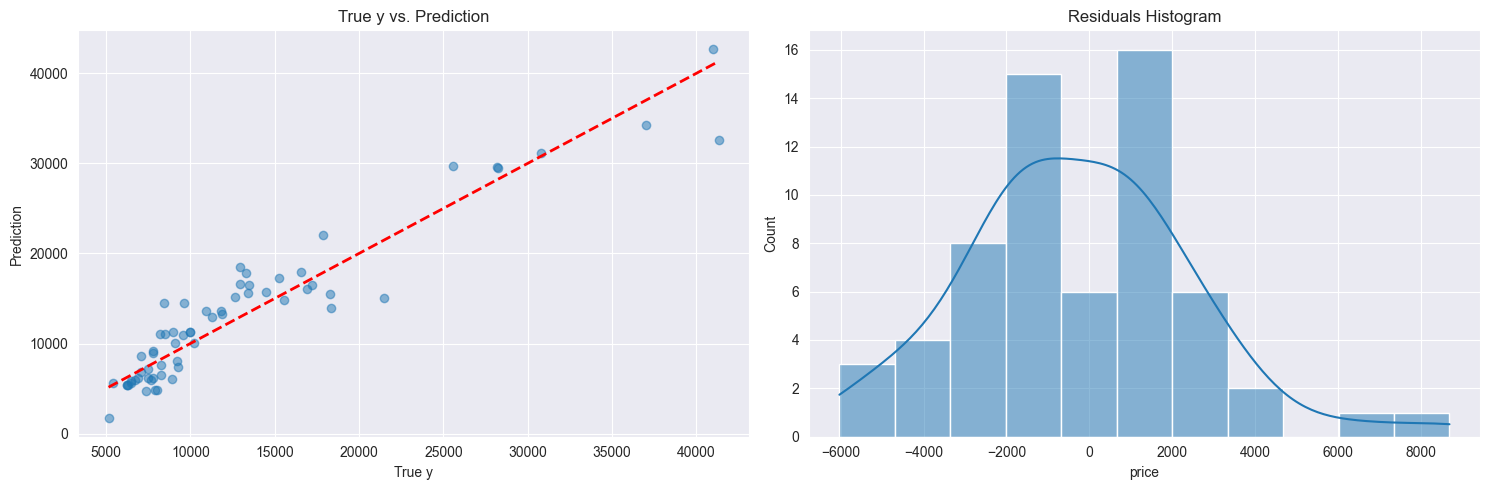

R² Score: 0.8929


In [25]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
#Make the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
predictions = lr_model.predict(X_test_scaled)
plt.figure(figsize=(15, 5))

# True vs Prediction scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True y')
plt.ylabel('Prediction')
plt.title('True y vs. Prediction')
plt.grid(True)

# Residuals histogram
plt.subplot(1, 2, 2)
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.xlabel('price')
plt.title('Residuals Histogram')
plt.grid(True)

plt.tight_layout()
plt.show()

r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

#sns.boxplot(y_train)


Lastly, create a dataframe of your model's coefficents. For example, we obtained the coefficients below.

[7 Points]

In [26]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

coefficients = lr_model.coef_  # This will get the coefficients from my trained model
feature_names = X.columns

# Create a DataFrame for he coefficients
coef_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])
print(coef_df)

                              Coefficient
car_size                     3.629588e+03
performance                  3.882311e+03
engine_geo                  -1.486329e+03
fuel_economy                 5.837681e+02
fueltype_gas                -6.378813e+02
aspiration_turbo             1.514698e+02
drivewheel_fwd               4.862866e+02
drivewheel_rwd               5.284811e+02
powertrain_dohc_six_mpfi    -4.851234e+02
powertrain_dohcv_eight_mpfi  5.815866e+01
powertrain_l_four_idi       -2.131469e+02
powertrain_l_four_mpfi      -3.097618e+02
powertrain_l_three_2bbl      6.195933e-12
powertrain_ohc_five_idi      7.093177e+02
powertrain_ohc_five_mpfi     5.230497e+02
powertrain_ohc_four_1bbl     7.921389e+01
powertrain_ohc_four_2bbl    -2.421635e+02
powertrain_ohc_four_idi      5.544213e+02
powertrain_ohc_four_mfi      9.094947e-13
powertrain_ohc_four_mpfi    -1.100921e+02
powertrain_ohc_four_spdi    -7.169974e+02
powertrain_ohc_four_spfi    -1.673312e+02
powertrain_ohc_six_idi       5.008

What do __your__ coefficients mean? Write a conclusion answering the problem statement we listed earlier, and what you've learned from the model.

### TYPE YOUR CONCLUSION HERE
Reading the coefficients it can be concluded that performance characteristics and the specifications of the vehicle are the most important in predicting the price of the car with the strongest positive price influences come from car size and performance metrics, with coefficients around 3,600 and 3,800 respectively, the following variables have the most significant impact in predicting the price of a car, with the Engine size and Curbweight having the most impact while the car width and length also having a strong impact in predicting the price of the cars based on those features.